<a href="https://colab.research.google.com/github/eduardarsimoes/IA_Algoritmos/blob/main/images/IN_Trab2_EduardaThiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREVISÃO DE ATAQUE CARDÍACO**
---
### IN 2020/2 - T2 Data Mining | Eduarda Simões e Thiago Moreira



## **IMPORTANDO BIBLIOTECAS**

In [ ]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=cf1c116f8ca8e2ed3a6364c74d9576bd1e37de4701a8f8846c1fdc3474ad5747
  Stored in directory: /tmp/pip-ephem-wheel-cache-4o8wlskf/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


## **CARREGANDO DATASET**

In [ ]:
# caminho do arquivo
url = "https://raw.githubusercontent.com/eduardarsimoes/IN_PrevisaoAtaqueCardiaco/main/heart.csv"

# lendo o arquivo csv
dataset = pd.read_csv(url, header=0, sep=',')

# as 10 primeiras linhas
print(dataset.head(10))

# descrição
print(dataset.describe())

# quantidade de linhas e colunas
print(dataset.shape)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]
              age         sex          cp  ...          ca     

## **PRÉ PROCESSAMENTO**

In [ ]:
# gerando o profiling report (EDA)
profile = ProfileReport(dataset, html={"style": {"full_width": True}}, sort="None") 

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:433: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [ ]:
# balanceamento - verificando a variação no atributo alvo
count_class_1, count_class_0 = dataset['target'].value_counts()
print("TARGET\n0: {}".format(count_class_0))
print("1: {}".format(count_class_1))

TARGET
0: 138
1: 165


### **SEPARANDO DADOS PARA TREINAMENTO E TESTE**

In [ ]:
# separando o target dos demais atributos
array = dataset.values 
x, y = array[:, 0:-1], array[:,-1]

print("TARGET \n",y,"\n")
print("ATRIBUTOS \n",x)

TARGET 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

ATRIBUTOS 
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  

### **PADRONIZANDO A ESCALA DOS DADOS**

In [ ]:
# criando o scaler
scaler = StandardScaler()  

# calculando os recursos para padronização
scaler.fit(x)

# transformando os dados
x = scaler.transform(x)

In [ ]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

## **DEFININDO FUNÇÕES E VARIÁVEIS**

In [ ]:
# soma duas matrizes quadráticas
def somarMatrizes(matrizes_confusao, matriz1, matriz2):
    result = []
    for i in range(len(matriz1)):   
        result.append([])
        for j in range(len(matriz1[0])):
            result[i].append(matriz1[i][j] + matriz2[i][j])
    matrizes_confusao.remove(matriz1)
    matrizes_confusao.remove(matriz2)
    matrizes_confusao.append(result)


# calcula as métricas a partir da matriz de confusão
def metricas(matriz):
  vp = matriz[0][0]
  fp = matriz[0][1]
  fn = matriz[1][0]
  vn = matriz[1][1]
  return vp/(vp+fp), vp/(vp+fn), (vp+vn)/(vp+vn+fp+fn)


# treina o modelo, prediz os valores, soma as matrizes de confusão para gerar a acumulada e calcula as métricas de desempenho da mesma
def modelando(test_train, model, matrizes_confusao, metrics):
  # para cada subconjunto
  for fold in test_train:
    x_train, x_test = fold[0], fold[1]
    y_train, y_test = fold[2], fold[3]
    
    # treinando o modelo
    model.fit(x_train, y_train)

    # predizendo o teste
    y_pred = model.predict(x_test)

    # criando a matriz de confusao do subconjunto
    matriz_conf = confusion_matrix(y_test, y_pred)
    matrizes_confusao.append(matriz_conf)

  # somando as matrizes
  while len(matrizes_confusao) != 1:
    somarMatrizes(matrizes_confusao, matrizes_confusao[0], matrizes_confusao[1])

  # calculando as metricas a partir da matriz de confusao acumulada
  precision, recall, accuracy = metricas(matrizes_confusao[0])
  
  # guardando as métricas para plotar o gráfico de comparacao de resultados
  metrics.append([precision, recall, accuracy])

  print("\nMATRIZ DE CONFUSÃO ACUMULADA:\n{}\n{}".format(matrizes_confusao[0][0], matrizes_confusao[0][1]))
  print("\nPRECISÃO:\n{:.3f} \n\nREVOCAÇÃO: \n{:.3f}\n\nACURÁCIA: \n{:.3f}".format(precision, recall, accuracy))

  # limpando a lista de matrizes
  matrizes_confusao.pop(-1)

In [ ]:
# definindo listas
matrizes_confusao = []
test_train        = []
metrics           = []

## **K-FOLD**

In [ ]:
# definindo k-fold
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

# separando  e guardando os subconjuntos
for train_index, test_index in kfold.split(x, y):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  test_train.append([x_train, x_test, y_train, y_test])

## **KNN**

In [ ]:
# para k = 3, 5, 7 e 9
for k in range(3, 10, 2):
  # criando o modelo knn
  modelKNN = KNeighborsClassifier(n_neighbors = k)
  
  print("\n\n--------\nKNN = {}".format(k))

  modelando(test_train, modelKNN, matrizes_confusao, metrics)   



--------
KNN = 3

MATRIZ DE CONFUSÃO ACUMULADA:
[106, 32]
[26, 139]

PRECISÃO:
0.768 

REVOCAÇÃO: 
0.803

ACURÁCIA: 
0.809


--------
KNN = 5

MATRIZ DE CONFUSÃO ACUMULADA:
[103, 35]
[23, 142]

PRECISÃO:
0.746 

REVOCAÇÃO: 
0.817

ACURÁCIA: 
0.809


--------
KNN = 7

MATRIZ DE CONFUSÃO ACUMULADA:
[108, 30]
[20, 145]

PRECISÃO:
0.783 

REVOCAÇÃO: 
0.844

ACURÁCIA: 
0.835


--------
KNN = 9

MATRIZ DE CONFUSÃO ACUMULADA:
[102, 36]
[19, 146]

PRECISÃO:
0.739 

REVOCAÇÃO: 
0.843

ACURÁCIA: 
0.818


## **SVM**

### **KERNEL LINEAR**

In [ ]:
# criando o modelo linear
modelLINEAR = svm.SVC(kernel = 'linear')

modelando(test_train, modelLINEAR, matrizes_confusao, metrics)


MATRIZ DE CONFUSÃO ACUMULADA:
[103, 35]
[13, 152]

PRECISÃO:
0.746 

REVOCAÇÃO: 
0.888

ACURÁCIA: 
0.842


### **KERNEL RBF**

In [ ]:
# criando o modelo rbf
modelRBF = svm.SVC(kernel = 'rbf')

modelando(test_train, modelRBF, matrizes_confusao, metrics)


MATRIZ DE CONFUSÃO ACUMULADA:
[106, 32]
[21, 144]

PRECISÃO:
0.768 

REVOCAÇÃO: 
0.835

ACURÁCIA: 
0.825


---
## **COMPARANDO RESULTADOS**

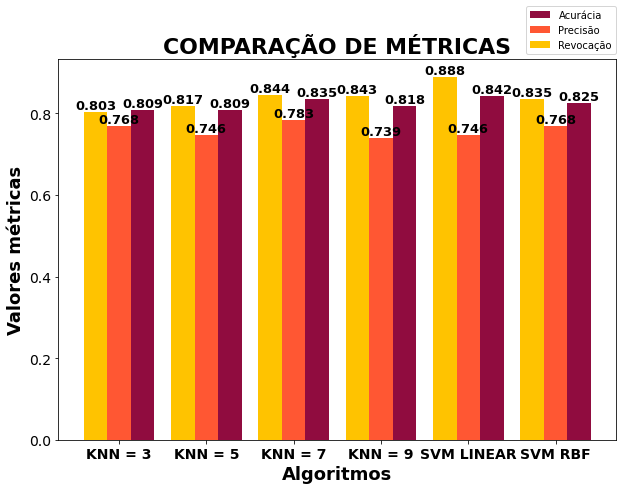

In [ ]:
# listas para criar barras
acuracias  = []
precisoes  = []
revocacoes = []

# definindo as categorias
algoritmos = ["KNN = 3", "KNN = 5", "KNN = 7", "KNN = 9", "SVM LINEAR", "SVM RBF"]

# pegando os indices para as barras
ind = np.arange(len(algoritmos))

# percorrendo a lista para separar as metricas
for item in metrics:
  precisoes.append(item[0])
  revocacoes.append(item[1])
  acuracias.append(item[2])

# criando figure e axes
fig, ax = plt.subplots()
width   = 0.27

# criando as barras
accuracy  = ax.bar(ind + width,    acuracias,  width, color = "#900C3F", label = "Acurácia")
precision = ax.bar(ind,            precisoes,  width, color = "#FF5733", label = "Precisão")
recall    = ax.bar(ind - width,    revocacoes, width, color = "#FFC300", label = "Revocação")

# nomeando o gráfico
ax.set_title("COMPARAÇÃO DE MÉTRICAS", fontsize = 22, fontweight = "bold")

# legendando Y
ax.set_ylabel("Valores métricas", fontsize = 18, fontweight = "bold")

# legendando X
plt.xlabel("Algoritmos", fontsize = 18, fontweight = "bold")

# legendando grupos de barras
plt.xticks(ticks = ind, labels = algoritmos, fontweight = "bold")

# legendando as cores das barras
plt.legend(bbox_to_anchor = (0.83, 1))

# aumentando o tamanho do gráfico para melhor visualização dos valores das barras
plt.gcf().set_size_inches(10, 7)

# aumentando o tamanho da fonte nos eixos
plt.tick_params(labelsize = 14)

# colocando valor referente a cada barra
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate("{:.3f}".format(round(h,3)),
                    xy = (rect.get_x() + rect.get_width() / 2, h),
                    ha = "center", va = "bottom", fontsize = 13, fontweight = "bold")

# referenciando os valores às barras
autolabel(accuracy)
autolabel(precision)
autolabel(recall)

# mostrando o gráfico
plt.show()